**CHAPTER 1: PENGENALAN & PRA-PEMROSESAN DATASET MNIST**

In [ ]:
# IMPORT LIBRARY
# Mengimpor pustaka inti TensorFlow dan Keras untuk membangun model
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.applications import VGG16
from tensorflow.keras.utils import to_categorical

# Pustaka standar untuk komputasi numerik dan plotting
import numpy as np
import matplotlib.pyplot as plt

# Pustaka untuk manipulasi gambar (PIL) dan I/O
from PIL import Image, ImageOps
import io

# Modul khusus Google Colab untuk fungsionalitas upload file
from google.colab import files

In [ ]:
# Memuat dataset MNIST, yang terbagi otomatis menjadi set latih dan uji
(x_train_orig, y_train_orig), (x_test_orig, y_test_orig) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


**Pra-pemrosesan Data untuk Model A (CNN dari Nol)**

In [ ]:
# 1. Normalisasi: Mengubah rentang piksel dari [0, 255] menjadi [0, 1]
#    Ini membantu proses training (optimasi) agar lebih stabil dan cepat konvergen.
x_train_A = x_train_orig.astype('float32') / 255.0
x_test_A = x_test_orig.astype('float32') / 255.0

In [ ]:
# 2. Penambahan Dimensi Channel: Mengubah shape dari (N, 28, 28) menjadi (N, 28, 28, 1)
#    Lapisan Conv2D Keras mengharapkan input 4D (batch, height, width, channels).
#    Angka '1' merepresentasikan channel grayscale.
x_train_A = np.expand_dims(x_train_A, -1)
x_test_A = np.expand_dims(x_test_A, -1)

print(f"Dimensi data latih Model A: {x_train_A.shape}")
print(f"Dimensi data uji Model A: {x_test_A.shape}")

Dimensi data latih Model A: (60000, 28, 28, 1)
Dimensi data uji Model A: (10000, 28, 28, 1)


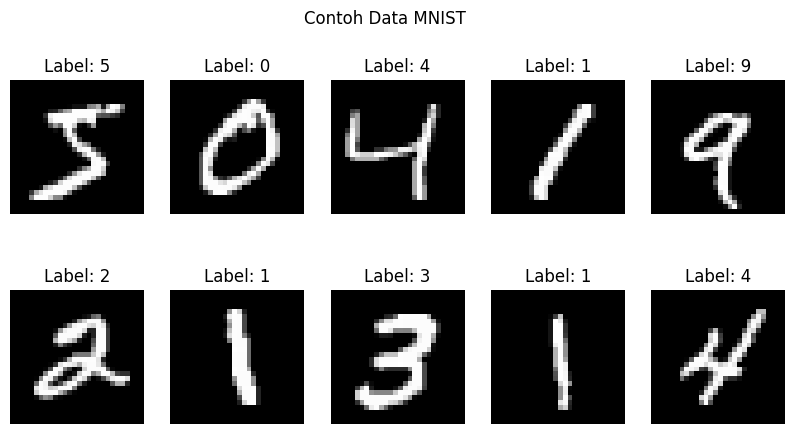

In [ ]:
# Visualisasi Data
# Memeriksa beberapa sampel data untuk memastikan data dimuat dengan benar
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train_orig[i], cmap='gray')
    plt.title(f"Label: {y_train_orig[i]}")
    plt.axis('off')
plt.suptitle("Contoh Data MNIST")
plt.show()

**CHAPTER 2: MODEL CNN DARI NOL (MODEL A)**

In [ ]:
# Definisi Arsitektur Model A
def build_model_A():
    # Menggunakan model Sequential, tumpukan lapisan linear
    model = Sequential([

        # 1. Lapisan Konvolusi Pertama: Mengekstraksi fitur dasar
        #    32 filter, kernel 3x3, fungsi aktivasi 'relu'
        #    input_shape (28, 28, 1) wajib didefinisikan di lapisan pertama
        Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),

        # 2. Lapisan Pooling: Mereduksi dimensi spasial (downsampling)
        #    Mengambil nilai maksimum dari window 2x2, membantu model
        #    menjadi lebih 'tahan' terhadap variasi posisi fitur
        MaxPooling2D((2, 2)),

        # 3. Lapisan Konvolusi Kedua: Mengekstraksi fitur yang lebih kompleks
        #    dari fitur lapisan sebelumnya
        Conv2D(64, (3, 3), activation='relu'),

        # 4. Lapisan Pooling Kedua
        MaxPooling2D((2, 2)),

        # 5. Lapisan Flatten: Mengubah data 3D (feature map) menjadi vektor 1D
        #    Sebagai "jembatan" antara lapisan konvolusi dan lapisan Dense
        Flatten(),

        # 6. Lapisan Dense (Fully Connected):
        #    128 neuron untuk melakukan klasifikasi berdasarkan fitur yang diekstraksi
        Dense(128, activation='relu'),

        # 7. Lapisan Dropout: Teknik regularisasi untuk mencegah overfitting
        #    Secara acak "mematikan" 50% neuron selama training
        Dropout(0.5),

        # 8. Lapisan Output: 10 neuron (sesuai jumlah kelas 0-9)
        #    Aktivasi 'softmax' mengubah output (logits) menjadi probabilitas
        #    untuk setiap kelas, di mana total probabilitasnya adalah 1.
        Dense(10, activation='softmax')
    ])

    # --- Kompilasi Model ---
    # Menentukan bagaimana model akan belajar
    model.compile(optimizer='adam',  # Optimizer 'Adam' efisien dan umum digunakan
                  # 'sparse_categorical_crossentropy' digunakan karena label (y_train_orig)
                  # adalah integer tunggal (0, 1, 2, ...), bukan one-hot encoding.
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy']) # Metrik yang ingin dipantau
    return model

# Membuat instance model
model_A = build_model_A()
# Menampilkan ringkasan arsitektur dan jumlah parameter
model_A.summary()

# --- Pelatihan Model A ---
print("\nMelatih Model A...")
# Memulai proses training pada data latih (x_train_A, y_train_orig)
# 'epochs=10' berarti model akan melihat keseluruhan dataset latih sebanyak 10 kali
# 'validation_data' digunakan untuk memantau performa model pada data
# yang tidak pernah dilihatnya (data uji) di setiap akhir epoch
history_A = model_A.fit(x_train_A, y_train_orig,
                        epochs=10,
                        validation_data=(x_test_A, y_test_orig))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)


Melatih Model A...
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 66s 34ms/step - accuracy: 0.8735 - loss: 0.4035 - val_accuracy: 0.9833 - val_loss: 0.0494
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 63s 34ms/step - accuracy: 0.9758 - loss: 0.0794 - val_accuracy: 0.9889 - val_loss: 0.0353
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 64s 34ms/step - accuracy: 0.9837 - loss: 0.0539 - val_accuracy: 0.9911 - val_loss: 0.0269
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 33ms/step - accuracy: 0.9865 - loss: 0.0433 - val_accuracy: 0.9919 - val_loss: 0.0240
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 62s 33ms/step - accuracy: 0.9888 - loss: 0.0361 - val_accuracy: 0.9925 - val_loss: 0.0250
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 63s 34ms/step - accuracy: 0.9899 - loss: 0.0325 - val_accuracy: 0.9926 - val_loss: 0.0239
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 34ms/step - accuracy: 0.9914 - loss: 0.0279 - val_accuracy: 0.9912 - val_loss: 0.0281
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 34ms/step 

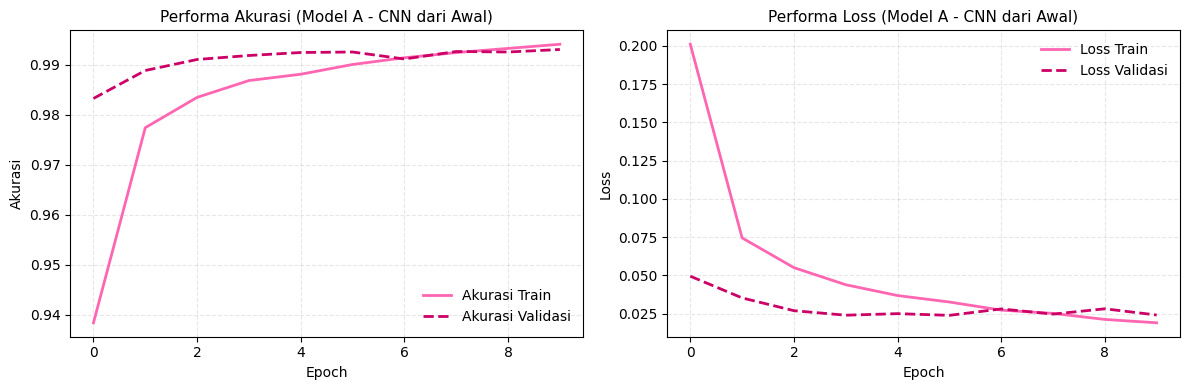

In [ ]:
# Plotting History
# Fungsi utilitas untuk memvisualisasikan progres Akurasi dan Loss
# selama training. Ini penting untuk mendeteksi overfitting/underfitting.
def plot_history_pink(history, title):
    plt.figure(figsize=(12, 4))

    pink_train = '#ff66b2'
    pink_val = '#cc0066'

    # --- Plot Akurasi ---
    plt.subplot(1, 2, 1)
    # 'accuracy' adalah akurasi pada data latih
    plt.plot(history.history['accuracy'], color=pink_train, linewidth=2, label='Akurasi Train')
    # 'val_accuracy' adalah akurasi pada data validasi (uji)
    plt.plot(history.history['val_accuracy'], color=pink_val, linestyle='--', linewidth=2, label='Akurasi Validasi')
    plt.xlabel('Epoch')
    plt.ylabel('Akurasi')
    plt.title(f'Performa Akurasi ({title})', fontsize=11)
    plt.legend(loc='lower right', frameon=False)
    plt.grid(True, linestyle='--', alpha=0.3)

    # --- Plot Loss ---
    plt.subplot(1, 2, 2)
    # 'loss' adalah loss pada data latih
    plt.plot(history.history['loss'], color=pink_train, linewidth=2, label='Loss Train')
    # 'val_loss' adalah loss pada data validasi (uji)
    plt.plot(history.history['val_loss'], color=pink_val, linestyle='--', linewidth=2, label='Loss Validasi')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title(f'Performa Loss ({title})', fontsize=11)
    plt.legend(loc='upper right', frameon=False)
    plt.grid(True, linestyle='--', alpha=0.3)

    plt.tight_layout()
    plt.show()

# Memanggil fungsi plot untuk history Model A
plot_history_pink(history_A, "Model A - CNN dari Awal")

CHAPTER 3: EVALUASI MODEL A DENGAN TULISAN TANGAN SENDIRI

In [ ]:
# Persiapan Evaluasi Kustom
# Mendefinisikan label sebenarnya (ground truth) untuk gambar yang akan di-upload
# Ini harus konsisten dengan urutan upload file Anda
NIM_ANGKA = [1, 2, 7]
true_labels = [NIM_ANGKA[0]] * 10 + [NIM_ANGKA[1]] * 10 + [NIM_ANGKA[2]] * 10

# Memanggil UI Colab untuk mengunggah file gambar (tulisan tangan Anda)
uploaded_files = files.upload()

Saving 1.jpg to 1.jpg
Saving 2.jpg to 2.jpg
Saving 3.jpg to 3.jpg
Saving 4.jpg to 4.jpg
Saving 5.jpg to 5.jpg
Saving 6.jpg to 6.jpg
Saving 7.jpg to 7.jpg
Saving 8.jpg to 8.jpg
Saving 9.jpg to 9.jpg
Saving 10.jpg to 10.jpg
Saving 11.jpg to 11.jpg
Saving 12.jpg to 12.jpg
Saving 13.jpg to 13.jpg
Saving 14.jpg to 14.jpg
Saving 15.jpg to 15.jpg
Saving 16.jpg to 16.jpg
Saving 17.jpg to 17.jpg
Saving 18.jpg to 18.jpg
Saving 19.jpg to 19.jpg
Saving 20.jpg to 20.jpg
Saving 21.jpg to 21.jpg
Saving 22.jpg to 22.jpg
Saving 23.jpg to 23.jpg
Saving 24.jpg to 24.jpg
Saving 25.jpg to 25.jpg
Saving 26.jpg to 26.jpg
Saving 27.jpg to 27.jpg
Saving 28.jpg to 28.jpg
Saving 29.jpg to 29.jpg
Saving 30.jpg to 30.jpg


In [ ]:
# Mengurutkan nama file secara alfabetis untuk memastikan konsistensi
# urutan gambar dengan 'true_labels'
uploaded_filenames = sorted(uploaded_files.keys())

# Fungsi Pra-pemrosesan Kustom (Model A)
# Fungsi ini harus MEREPLIKASI langkah-langkah pra-pemrosesan
# yang dilakukan pada data latih MNIST untuk Model A
def preprocess_image_A(image_bytes):
    # Buka gambar dari 'bytes' yang di-upload
    img = Image.open(io.BytesIO(image_bytes))
    # 1. Konversi ke grayscale (L = Luminance)
    img = img.convert('L')
    # 2. Inversi warna: Langkah krusial!
    #    Dataset MNIST adalah tulisan putih di background hitam.
    #    Tulisan tangan Anda kemungkinan besar hitam di background putih.
    #    ImageOps.invert() membalikkan ini agar konsisten.
    img = ImageOps.invert(img)
    # 3. Resize ke 28x28: Menyesuaikan ukuran gambar dengan input Model A
    #    'LANCZOS' adalah filter antialiasing berkualitas tinggi untuk resizing
    img = img.resize((28, 28), Image.Resampling.LANCZOS)
    # 4. Konversi ke numpy array
    img_array = np.array(img)
    # 5. Normalisasi: Sama seperti data latih (rentang [0, 1])
    img_array = img_array.astype('float32') / 255.0
    # 6. Reshape: Menyesuaikan dimensi agar sesuai dengan input model
    #    (1, 28, 28, 1) -> 1 batch, tinggi 28, lebar 28, 1 channel
    img_array = np.expand_dims(img_array, axis=0)
    img_array = np.expand_dims(img_array, axis=-1)
    return img_array

# Proses Prediksi Kustom (Model A)
processed_images_A = []
predictions_A = []
correct_count_A = 0

print("\nMemproses dan Memprediksi Gambar Tulisan Tangan (Model A)...")
# Iterasi melalui setiap file gambar yang di-upload
for i, filename in enumerate(uploaded_filenames):
    if i >= 30: break # Membatasi hanya 30 gambar (sesuai true_labels)
    image_bytes = uploaded_files[filename]

    # Memproses gambar menggunakan fungsi yang tadi dibuat
    processed_img = preprocess_image_A(image_bytes)
    processed_images_A.append(processed_img)

    # Melakukan inferensi (prediksi) menggunakan Model A
    prediction_array = model_A.predict(processed_img)
    # Mengambil indeks (kelas) dengan probabilitas tertinggi
    predicted_label = np.argmax(prediction_array)
    predictions_A.append(predicted_label)

    # Membandingkan prediksi dengan label sebenarnya
    true_label = true_labels[i]
    is_correct = (predicted_label == true_label)
    if is_correct:
        correct_count_A += 1 # Akumulasi skor

    print(f"Gambar {i+1} ('{filename}'): Label Sebenarnya: {true_label} -> Prediksi Model A: {predicted_label} ({'TRUE' if is_correct else 'FALSE'})")


Memproses dan Memprediksi Gambar Tulisan Tangan (Model A)...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
Gambar 1 ('1.jpg'): Label Sebenarnya: 1 -> Prediksi Model A: 1 (TRUE)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
Gambar 2 ('10.jpg'): Label Sebenarnya: 1 -> Prediksi Model A: 1 (TRUE)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
Gambar 3 ('11.jpg'): Label Sebenarnya: 1 -> Prediksi Model A: 2 (FALSE)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
Gambar 4 ('12.jpg'): Label Sebenarnya: 1 -> Prediksi Model A: 2 (FALSE)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Gambar 5 ('13.jpg'): Label Sebenarnya: 1 -> Prediksi Model A: 2 (FALSE)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Gambar 6 ('14.jpg'): Label Sebenarnya: 1 -> Prediksi Model A: 2 (FALSE)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Gambar 7 ('15.jpg'): Label Sebenarnya: 1 -> Prediksi Model A: 2 (FALSE)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Gambar 8 ('16.jpg'): Label Sebenarnya: 1 -> Prediksi Model A: 2 (FALSE)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Gambar 9 ('17.jpg'): L

In [ ]:
# Perhitungan Akurasi Kustom (Model A)
accuracy_A = (correct_count_A / len(predictions_A)) * 100
print(f"\nTotal Prediksi Benar (Model A): {correct_count_A} / {len(predictions_A)}")
print(f"Akurasi Model A pada Tulisan Tangan Anda: {accuracy_A:.2f}%")


Total Prediksi Benar (Model A): 7 / 30
Akurasi Model A pada Tulisan Tangan Anda: 23.33%



Visualisasi 5 contoh gambar tulisan tangan setelah pra-pemrosesan (Model A):


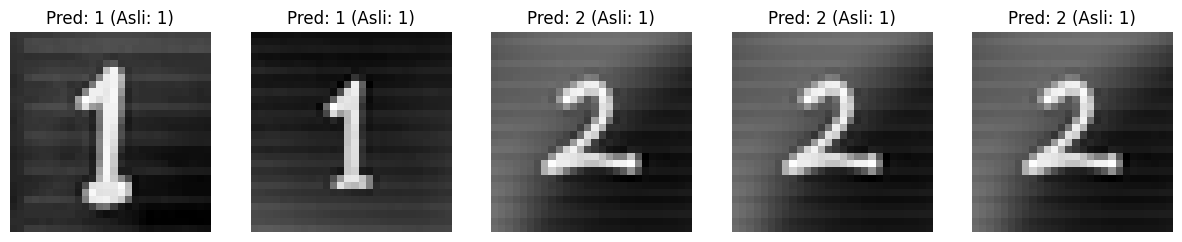

In [ ]:
# Visualisasi beberapa gambar yang telah diproses untuk verifikasi
print("\nVisualisasi 5 contoh gambar tulisan tangan setelah pra-pemrosesan (Model A):")
plt.figure(figsize=(15, 3))
for i in range(5):
    if i < len(processed_images_A):
        plt.subplot(1, 5, i + 1)
        # Reshape kembali ke 2D (28, 28) agar bisa ditampilkan oleh plt.imshow
        plt.imshow(processed_images_A[i].reshape(28, 28), cmap='gray')
        plt.title(f"Pred: {predictions_A[i]} (Asli: {true_labels[i]})")
        plt.axis('off')
plt.show()

**CHAPTER 4: IMPLEMENTASI TRANSFER LEARNING (MODEL B)**

In [ ]:
# Pra-pemrosesan data MNIST untuk Model B (VGG16)
# VGG16 memiliki arsitektur yang berbeda dan dilatih di ImageNet.
# Inputnya harus disesuaikan.

# 1. Resize 28x28 ke 32x32: VGG16 memiliki ukuran input minimal (biasanya 32x32 atau 48x48)
#    Kita gunakan 32x32 sebagai ukuran input minimum yang umum.
x_train_B_resized = tf.image.resize(tf.expand_dims(x_train_orig, -1), [32, 32])
x_test_B_resized = tf.image.resize(tf.expand_dims(x_test_orig, -1), [32, 32])

# 2. Konversi Grayscale ke RGB: VGG16 dilatih pada data ImageNet (berwarna)
#    dan mengharapkan input 3 channel (RGB).
#    Kita menduplikasi channel grayscale (1 channel) menjadi 3 channel.
x_train_B = tf.image.grayscale_to_rgb(x_train_B_resized).numpy()
x_test_B = tf.image.grayscale_to_rgb(x_test_B_resized).numpy()

# 3. Normalisasi: Sama seperti sebelumnya, menormalkan data ke [0, 1]
#    (Meskipun VGG16 sering menggunakan 'preprocess_input' khusus,
#     normalisasi [0, 1] sudah cukup baik untuk fine-tuning sederhana)
x_train_B = x_train_B.astype('float32') / 255.0
x_test_B = x_test_B.astype('float32') / 255.0

print(f"Dimensi data latih Model B: {x_train_B.shape}")
print(f"Dimensi data uji Model B: {x_test_B.shape}")

Dimensi data latih Model B: (60000, 32, 32, 3)
Dimensi data uji Model B: (10000, 32, 32, 3)


In [14]:
# Definisi Arsitektur Model B (Transfer Learning)
def build_model_B():
    # 1. Muat VGG16 sebagai base model
    #    'weights='imagenet'`: Menggunakan bobot (weights) hasil pra-pelatihan di ImageNet
    #    'include_top=False`: Hanya mengambil bagian konvolusi (feature extractor),
    #                         tanpa lapisan klasifikasi (Dense) asli dari VGG16.
    #    'input_shape=(32, 32, 3)`: Menentukan ukuran input baru kita.
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

    # 2. Bekukan (Freeze) Lapisan Base Model: Ini adalah inti dari Transfer Learning!
    #    Kita tidak ingin mengubah bobot VGG16 yang sudah 'pintar'
    #    dalam mengekstraksi fitur. Kita hanya akan melatih lapisan baru di atasnya.
    base_model.trainable = False

    # 3. Tambahkan Lapisan Kustom (Head) di atas Base Model
    x = base_model.output # Mengambil output dari lapisan terakhir VGG16
    # GlobalAveragePooling2D: Alternatif dari Flatten.
    # Mengambil rata-rata dari setiap feature map, lebih efisien
    # dan mengurangi jumlah parameter secara drastis.
    x = GlobalAveragePooling2D()(x)
    # Lapisan Dense untuk klasifikasi
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.5)(x) # Regularisasi
    # Lapisan output baru kita, 10 kelas (digit 0-9)
    output_layer = Dense(10, activation='softmax')(x)

    # 4. Gabungkan: Membuat model baru
    #    Inputnya adalah input VGG16, outputnya adalah output_layer kita
    model = Model(inputs=base_model.input, outputs=output_layer)

    # 5. Kompilasi Model
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

model_B = build_model_B()
# Perhatikan 'Non-trainable params' akan sangat besar,
# ini adalah bobot dari VGG16 yang kita 'bekukan'.
model_B.summary()

# --- Latih Model B ---
print("\nMelatih Model B...")
# Kita hanya melatih lapisan Dense dan Dropout yang baru kita tambahkan
history_B = model_B.fit(x_train_B, y_train_orig,
                        epochs=10,
                        validation_data=(x_test_B, y_test_orig))

# (Plotting history untuk Model B bisa ditambahkan di sini jika perlu,
#  menggunakan fungsi plot_history_pink(history_B, "Model B - Transfer Learning"))

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 16, 16, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 4, 4, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 1, 1, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,781,642 (56.39 MB)

 Trainable params: 66,954 (261.54 KB)

 Non-trainable params: 14,714,688 (56.13 MB)


Melatih Model B...
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 921s 488ms/step - accuracy: 0.7389 - loss: 0.8268 - val_accuracy: 0.9440 - val_loss: 0.1832
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 898s 479ms/step - accuracy: 0.9228 - loss: 0.2544 - val_accuracy: 0.9564 - val_loss: 0.1398
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 893s 476ms/step - accuracy: 0.9373 - loss: 0.2007 - val_accuracy: 0.9617 - val_loss: 0.1163
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 883s 471ms/step - accuracy: 0.9452 - loss: 0.1742 - val_accuracy: 0.9612 - val_loss: 0.1179
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 943s 482ms/step - accuracy: 0.9509 - loss: 0.1563 - val_accuracy: 0.9692 - val_loss: 0.0982
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 893s 476ms/step - accuracy: 0.9540 - loss: 0.1483 - val_accuracy: 0.9708 - val_loss: 0.0896
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 883s 471ms/step - accuracy: 0.9554 - loss: 0.1393 - val_accuracy: 0.9700 - val_loss: 0.0891
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 

**CHAPTER 5: EVALUASI MODEL B DENGAN TULISAN TANGAN SENDIRI**

In [15]:
# --- Fungsi Pra-pemrosesan Kustom (Model B) ---
# Harus mereplikasi langkah pra-pemrosesan data latih Model B
def preprocess_image_B(image_bytes):

    img = Image.open(io.BytesIO(image_bytes))
    # 1. Konversi Grayscale
    img_L = img.convert('L')
    # 2. Inversi Warna (Hitam -> Putih, Putih -> Hitam)
    img_L_inv = ImageOps.invert(img_L)
    # 3. Resize ke 32x32 (sesuai input VGG16)
    img_resized = img_L_inv.resize((32, 32), Image.Resampling.LANCZOS)
    # 4. Konversi ke RGB (3 channel)
    img_rgb = img_resized.convert('RGB')
    # 5. Konversi ke Numpy Array
    img_array = np.array(img_rgb)
    # 6. Normalisasi
    img_array = img_array.astype('float32') / 255.0
    # 7. Reshape (1, 32, 32, 3) -> 1 batch, tinggi 32, lebar 32, 3 channel
    img_array = np.expand_dims(img_array, axis=0)

    return img_array

# --- Proses Prediksi Kustom (Model B) ---
processed_images_B = []
predictions_B = []
correct_count_B = 0

print("\nMemproses dan Memprediksi Gambar Tulisan Tangan (Model B)...")

# Menggunakan file yang sama (uploaded_filenames) dari upload sebelumnya
for i, filename in enumerate(uploaded_filenames):
    if i >= 30: break
    image_bytes = uploaded_files[filename]

    # Memproses gambar menggunakan fungsi untuk Model B
    processed_img = preprocess_image_B(image_bytes)
    processed_images_B.append(processed_img)

    # Inferensi menggunakan Model B
    prediction_array = model_B.predict(processed_img)
    predicted_label = np.argmax(prediction_array)
    predictions_B.append(predicted_label)

    # Pengecekan akurasi
    true_label = true_labels[i]
    is_correct = (predicted_label == true_label)
    if is_correct:
        correct_count_B += 1

    print(f"Gambar {i+1} ('{filename}'): Label Sebenarnya: {true_label} -> Prediksi Model B: {predicted_label} ({'TRUE' if is_correct else 'FALSE'})")


Memproses dan Memprediksi Gambar Tulisan Tangan (Model B)...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step
Gambar 1 ('1.jpg'): Label Sebenarnya: 1 -> Prediksi Model B: 1 (TRUE)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
Gambar 2 ('10.jpg'): Label Sebenarnya: 1 -> Prediksi Model B: 3 (FALSE)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
Gambar 3 ('11.jpg'): Label Sebenarnya: 1 -> Prediksi Model B: 2 (FALSE)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
Gambar 4 ('12.jpg'): Label Sebenarnya: 1 -> Prediksi Model B: 2 (FALSE)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
Gambar 5 ('13.jpg'): Label Sebenarnya: 1 -> Prediksi Model B: 2 (FALSE)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
Gambar 6 ('14.jpg'): Label Sebenarnya: 1 -> Prediksi Model B: 2 (FALSE)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
Gambar 7 ('15.jpg'): Label Sebenarnya: 1 -> Prediksi Model B: 2 (FALSE)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
Gambar 8 ('16.jpg'): Label Sebenarnya: 1 -> Prediksi Model B: 2 (FALSE)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
Gambar 9 ('17.jpg'): 

In [16]:
# --- Perhitungan Akurasi Kustom (Model B) ---
accuracy_B = (correct_count_B / len(predictions_B)) * 100
print(f"\nTotal Prediksi Benar (Model B): {correct_count_B} / {len(predictions_B)}")
print(f"Akurasi Model B pada Tulisan Tangan Anda: {accuracy_B:.2f}%")


Total Prediksi Benar (Model B): 6 / 30
Akurasi Model B pada Tulisan Tangan Anda: 20.00%



Visualisasi 15 contoh gambar tulisan tangan setelah pra-pemrosesan (Model B):


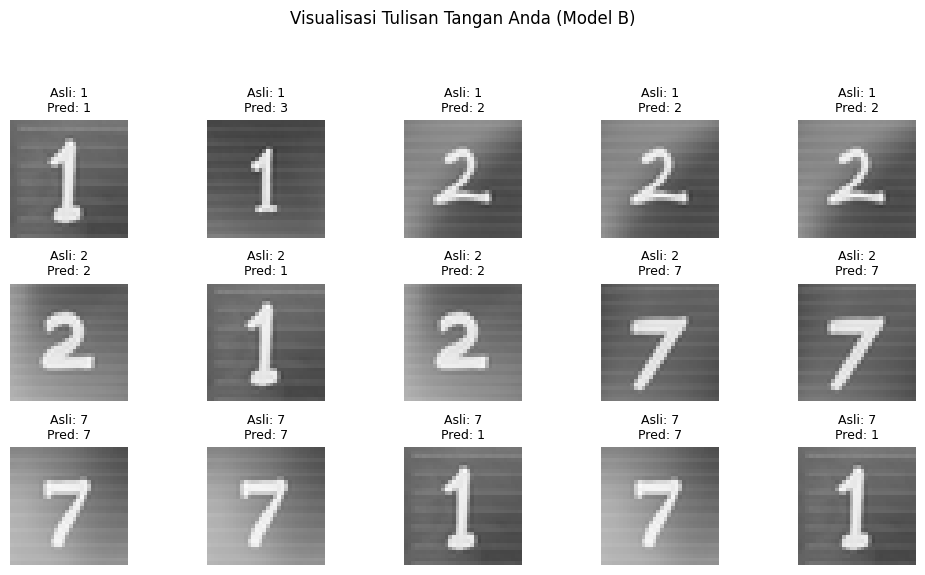

In [17]:
# --- Visualisasi Hasil Model B ---
print("\nVisualisasi 15 contoh gambar tulisan tangan setelah pra-pemrosesan (Model B):")
plt.figure(figsize=(10, 6))
plt.suptitle("Visualisasi Tulisan Tangan Anda (Model B)")

# Menampilkan 5 sampel dari setiap digit (0, 2, 7)
indices_to_show_B = list(range(0, 5)) + list(range(10, 15)) + list(range(20, 25))

for plot_num, img_index in enumerate(indices_to_show_B):
    if img_index < len(processed_images_B):
        plt.subplot(3, 5, plot_num + 1)

        # Data untuk ditampilkan (reshape ke 32x32x3)
        img_data = processed_images_B[img_index].reshape(32, 32, 3)
        true_label = true_labels[img_index]
        pred_label = predictions_B[img_index]

        # Menampilkan gambar RGB (hasil resize)
        plt.imshow(img_data)
        plt.title(f"Asli: {true_label}\nPred: {pred_label}", fontsize=9)
        plt.axis('off')

plt.tight_layout(rect=[0, 0.03, 1, 0.93])
plt.show()

**CHAPTER 6: ANALISIS PERBANDINGAN & KESIMPULAN**

In [18]:
# --- Perbandingan Final ---
# Mencetak akurasi akhir dari kedua model pada data tulisan tangan
# kustom Anda untuk perbandingan langsung.
print(f"Akurasi Model A (CNN dari Nol): {accuracy_A:.2f}%")
print(f"Akurasi Model B (Transfer Learning): {accuracy_B:.2f}%")

Akurasi Model A (CNN dari Nol): 23.33%
Akurasi Model B (Transfer Learning): 20.00%
